In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# ----------------------------------------
# Load full MNIST dataset (28x28, 70K samples)
# ----------------------------------------
print("Fetching MNIST data (this may take a while)...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)  # y needs to be int, not string
print("MNIST data loaded:", X.shape)

Fetching MNIST data (this may take a while)...


/Users/mitushigoyal/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


MNIST data loaded: (70000, 784)


Average accuracy for k = 1: 0.9722
Average accuracy for k = 3: 0.9733
Average accuracy for k = 5: 0.9721
Average accuracy for k = 7: 0.9711
Average accuracy for k = 9: 0.9695

 Best k: 3
 Best single-run accuracy: 0.974


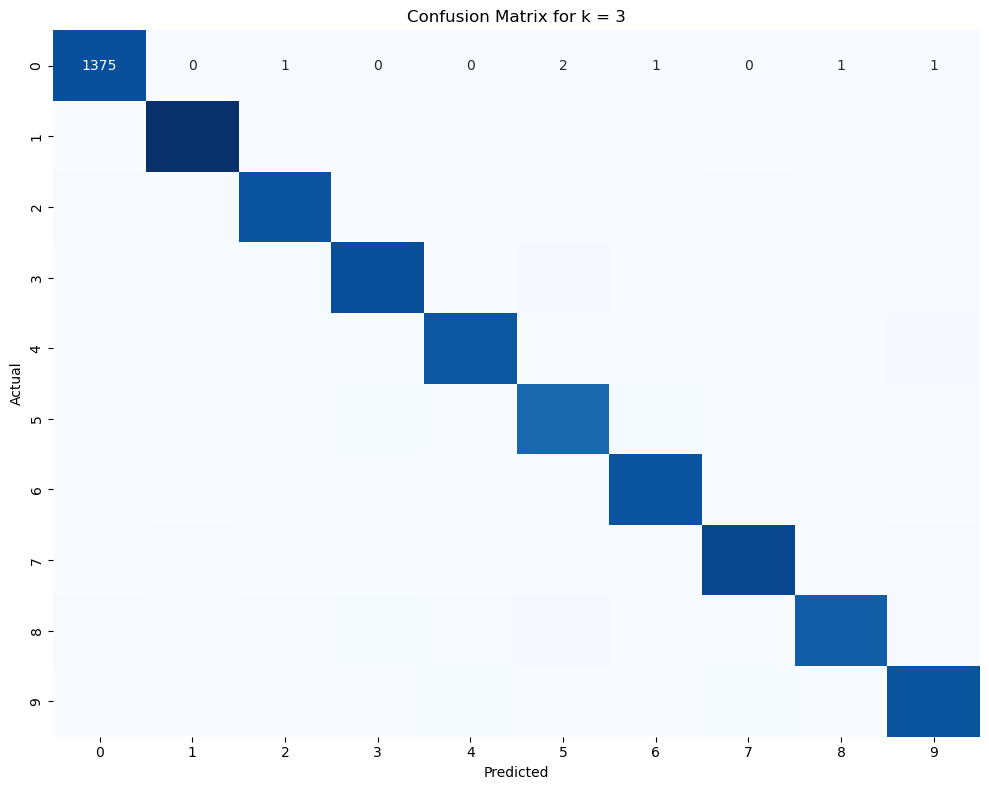

In [4]:
# ----------------------------------------
# Define candidate k values and iterations
# ----------------------------------------
k_value_candidates = [1, 3, 5, 7, 9]
number_of_iterations = 5

best_k = None
best_accuracy = 0.0
conf_matrix_best = None

# ----------------------------------------
# Model Selection using Random Splits
# ----------------------------------------
for k in k_value_candidates:
    accuracies = []

    for i in range(number_of_iterations):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=i  # fixed random state for reproducibility
        )
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        
        # Save confusion matrix only for best performing k
        if acc > best_accuracy:
            best_accuracy = acc
            best_k = k
            conf_matrix_best = confusion_matrix(y_test, y_pred)

    print(f"Average accuracy for k = {k}: {np.mean(accuracies):.4f}")

# ----------------------------------------
# Final Results
# ----------------------------------------
print("\n Best k:", best_k)
print(" Best single-run accuracy:", best_accuracy)

# ----------------------------------------
# Plot Confusion Matrix for Best k
# ----------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for k = {best_k}")
plt.tight_layout()
plt.show()